# PYTHON 2.7 version
## (this is necessary as some python libraries are not available for python 3)


## Script to calculate molecular descriptors
### In the following cell linux command to install the python libraries

In [0]:
# rdkit: https://www.rdkit.org/
# openbabel: http://openbabel.org/wiki/Main_Page
# sklearn: https://scikit-learn.org/stable/

!apt-get install python-rdkit librdkit1 rdkit-data -qq python-openbabel python-sklearn

In [0]:
# import the needed library

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw

import pybel,openbabel

In [0]:
# Prepare a list of SMILES
compounds = [
    'CCCCO',
    'C1=CC=CC=C1C(=O)O',
    'C1CCCCCCCCCCCC1',
    'C1CCC1',
    'C[C@@H](CC1=CC=CC=C1)NC',
    'Cn1cnc2c1c(=O)n(c(=O)n2C)C',
    'C1=C2C(=CC(=C1Cl)Cl)OC3=CC(=C(C=C3O2)Cl)Cl',
]

In [0]:
def calculate_rdkit_lipinsky(smiles, black_list=[]):
  '''
  A function to calculate RDKit lipinsky Ro5
  '''
  Lipinsky = ['MolWt', 'MolLogP', 'NumHAcceptors', 'NumHDonors']
  rdmol = Chem.MolFromSmiles(smiles)
  for name, func in [x for x in Descriptors.descList if x[0] in Lipinsky]:
      if name not in black_list:
          value = func(rdmol)
          print("RDKit --> {} = {}".format(name, value))

In [0]:
def calculate_ob_lipinsky(smiles):
    '''
    A function to calculate openbabel lipinsky Ro5
    '''
    Lipinsky = ['MW', 'HBA1', 'HBD', 'logP']
    molecule = pybel.readstring('smi', smiles)
    descs = molecule.calcdesc()
    result = []
    for name in Lipinsky:
        print("Openbabel --> {} = {}".format(name, descs[name]))

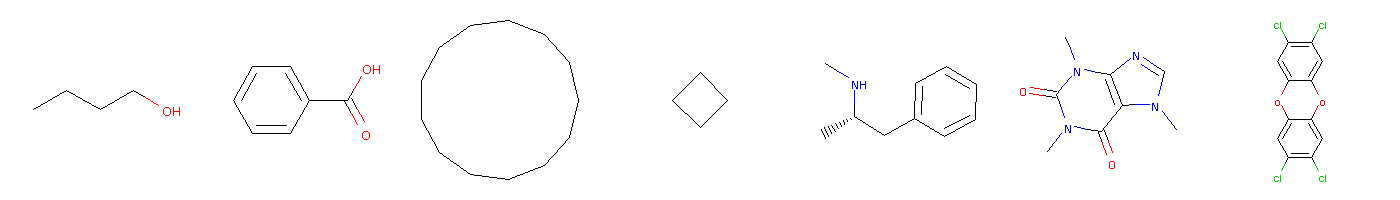

In [0]:
# Convert all the SMILES int rdkit mol objects and store in a new list
compounds_2D = []
for compound in compounds:
  m = Chem.MolFromSmiles(compound)
  compounds_2D.append(Chem.MolFromSmiles(compound))
# Display all the moleculess
Draw.MolsToImage(compounds_2D)

In [0]:
for i, compound in enumerate(compounds):
  print '====================== Compound', i, '======================' 
  calculate_rdkit_lipinsky(compound)
  print('')
  calculate_ob_lipinsky(compound)

====================== Compound 0 ======================
RDKit --> MolWt = 74.123
RDKit --> NumHAcceptors = 1
RDKit --> NumHDonors = 1
RDKit --> MolLogP = 0.7788

Openbabel --> MW = 74.1216
Openbabel --> HBA1 = 1.0
Openbabel --> HBD = 1.0
Openbabel --> logP = 0.7788
====================== Compound 1 ======================
RDKit --> MolWt = 122.123
RDKit --> NumHAcceptors = 1
RDKit --> NumHDonors = 1
RDKit --> MolLogP = 1.3848

Openbabel --> MW = 122.12134
Openbabel --> HBA1 = 2.0
Openbabel --> HBD = 1.0
Openbabel --> logP = 1.3848
====================== Compound 2 ======================
RDKit --> MolWt = 182.351
RDKit --> NumHAcceptors = 0
RDKit --> NumHDonors = 0
RDKit --> MolLogP = 5.0713

Openbabel --> MW = 182.34554
Openbabel --> HBA1 = 0.0
Openbabel --> HBD = 0.0
Openbabel --> logP = 5.0713
====================== Compound 3 ======================
RDKit --> MolWt = 56.108
RDKit --> NumHAcceptors = 0
RDKit --> NumHDonors = 0
RDKit --> MolLogP = 1.5604

Openbabel --> MW = 56.10632
Op